In [1]:
!pip install highlight_text

In [2]:
import warnings
warnings.simplefilter(action='ignore')  # убираем предупрждения

import pandas as pd  # библиотека для работы с табличными данными
import numpy as np  # библиотека для работы с числовыми массивами
import matplotlib.pyplot as plt  # библиотека для визуализации
from highlight_text import fig_text  # библиотека для подписей на визуализациях

In [3]:
# ссылка на fbref с данными об игроках Пари НН
site = 'https://fbref.com/en/squads/c28444cc/Nizhny-Novgorod-Stats#all_stats_standard'

# предобработка данных с сайта fbref: оставляем только нужную нам таблицу
df = pd.read_html(site)
fbref_df = df[0]
fbref_df.columns = fbref_df.columns.get_level_values(1)

# импортируем "ручные" данные с гугл-диска
DELIMITER = ";"  # разделитель колонок в csv-файле
PATH_TO_MANUAL_DATA = "/content/drive/MyDrive/Pari_NN/pari_NN_age_profiles.csv"  # путь к "ручным" данным на гугл-диске
playing_time_cor_df = pd.read_csv(PATH_TO_MANUAL_DATA, delimiter=DELIMITER)
playing_time_cor_df['%'] = [val.replace(",", ".") for val in playing_time_cor_df['%']]
playing_time_cor_df['%'] = playing_time_cor_df['%'].astype(float)

In [4]:
SAVE_FBREF_DATA = True

if SAVE_FBREF_DATA:  # если True, сохраняем данные с fbref на гугл диск (на всякий случай)
  PATH_TO_SAVE = "/".join(PATH_TO_MANUAL_DATA.split("/")[:-1]) + "/fbref_data.csv"
  fbref_df.to_csv(PATH_TO_SAVE, sep=";")

In [5]:
# посмотрим на первые 5 строк нашей таблицы
playing_time_cor_df.head()

,Player,матчей,мах,мин мах,минут,%
0,Nikita Medvedev,18,18,1620,1620,100.0
1,Ivan Kukushkin,0,18,1620,0,0.0
2,Vadim Lukyanov,0,18,1620,0,0.0
3,Viktor Aleksandrov,9,18,1620,685,42.3
4,Kirill Bozhenov,14,18,1620,782,48.3


In [6]:
# убираем total'ы из данных fbref
fbref_df = fbref_df[fbref_df['Nation'].notna()]
# заполняем пустые ячейки нулями в данных fbref
fbref_df = fbref_df.fillna(0.0)

In [7]:
TO_MERGE = True  # если True, то объединяем нашу таблицу и данные fbref

if TO_MERGE:
  total_df = fbref_df.merge(playing_time_cor_df, on='Player', how='left')
else:
  total_df = playing_time_cor_df

In [8]:
DAYS_IN_YEAR = 365

# вычисляем возраст игрока на сегодняшний день из данных fbref
total_df["Возраст"] = [round(float(age.split("-")[0]) + float(age.split("-")[-1]) / DAYS_IN_YEAR, 3)
                      for age in total_df["Age"]]

In [9]:
# добавляем колонку "Фамилия" для краткого представления игрока на графике
total_df["Фамилия"] = [name if len(name) < 9 else name.split()[-1] for name in total_df["Player"]]

In [10]:
# смотрим на итоговые данные
total_df.tail()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G-PK,G+A-PK,Matches,матчей,мах,мин мах,минут,%,Возраст,Фамилия
25,Artem Chistyakov,ru RUS,DF,17-256,1,0,6.0,0.1,0.0,0.0,...,0.0,0.0,Matches,1,14,1260,6,0.5,17.701,Chistyakov
26,Dmitrii Kalaida,ru RUS,MF,19-327,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,Matches,0,18,1620,0,0.0,19.896,Kalaida
27,Ivan Kukushkin,ru RUS,GK,22-156,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,Matches,0,18,1620,0,0.0,22.427,Kukushkin
28,Vadim Lukyanov,ru RUS,GK,22-011,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,Matches,0,18,1620,0,0.0,22.030,Lukyanov
29,Artem Varganov,ru RUS,DF,20-143,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,Matches,0,18,1620,0,0.0,20.392,Varganov


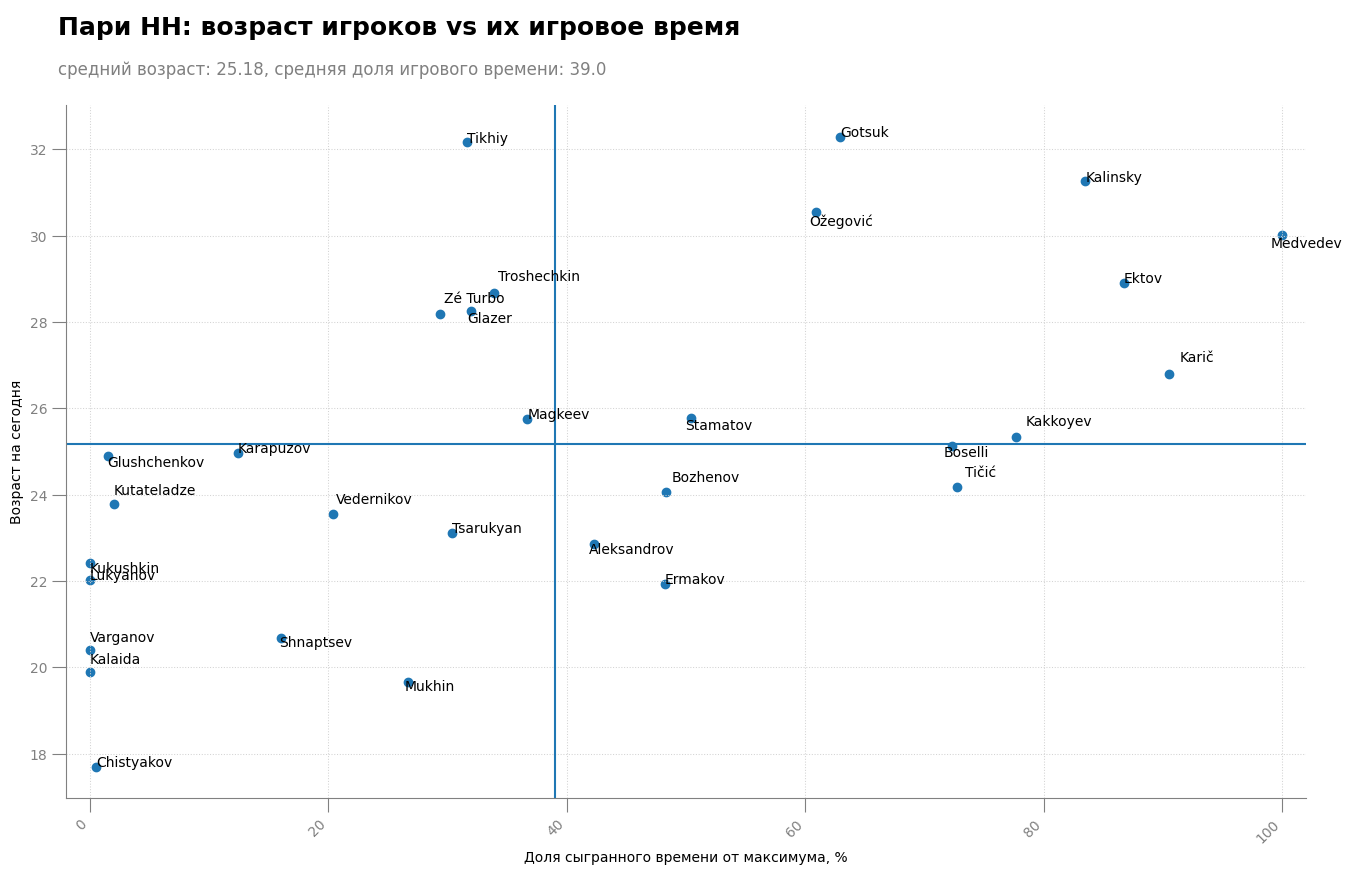

In [11]:
# размер графика
LENGTH = 16  # длина
HEIGHT = 9  # высота
plt.figure(figsize=(LENGTH, HEIGHT))

# что выводить по осям Х и У
X = "%"  # название колонки, которая будет выведена по оси Х
Y = "Возраст"  # название колонки, которая будет выведена по оси У
PLAYER_NAME = "Фамилия"  # название колонки, из котрой будут взяты названия для точек
plt.scatter(total_df[X], total_df[Y])

# подписи для графиков по осям
HEADER_X = 'Доля сыгранного времени от максимума, %'  # подпись по оси Х
HEADER_Y = "Возраст на сегодня"  # подпись по оси У
plt.xlabel(HEADER_X)
plt.ylabel(HEADER_Y)

# оформление: предлагаю его пока не менять
plt.grid(linestyle=':')
plt.xticks(rotation=45, ha='right')

MARGIN = 2
plt.xlim([0.0 - MARGIN, 100.0 + MARGIN])

ax = plt.subplot(111)
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

ax.grid(
    visible = True,
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey",
    length = 10,
    which = "major",
    labelsize = 10,
    labelcolor = "grey"
)

display_types = ["lower left", "center", "upper right"]
d_i = 0

for i in range(len(total_df)):
  if d_i >= len(display_types):
    d_i = 0

  if display_types[d_i] == "lower left":
    x_coord = total_df.iloc[i][X] - total_df.iloc[i][X] * 0.01
    y_coord = total_df.iloc[i][Y] - total_df.iloc[i][Y] * 0.01
  elif display_types[d_i] == "center":
    x_coord = total_df.iloc[i][X]
    y_coord = total_df.iloc[i][Y]
  elif display_types[d_i] == "upper right":
    x_coord = total_df.iloc[i][X] + total_df.iloc[i][X] * 0.01
    y_coord = total_df.iloc[i][Y] + total_df.iloc[i][Y] * 0.01

  try:
    ax.annotate(total_df.iloc[i][PLAYER_NAME], (x_coord, y_coord))
  except NameError:
    print(d_i, display_types[d_i])

  d_i += 1

#добавляем средние значения
mean_X = round(np.nanmean(total_df[X]), 2)
mean_Y = round(np.nanmean(total_df[Y]), 2)
plt.axvline(x=mean_X)
plt.axhline(y=mean_Y)

MAIN_HEADER = "Пари НН: возраст игроков vs их игровое время"
SUB_HEADER = f"средний возраст: {mean_Y}, средняя доля игрового времени: {mean_X}"

fig_text(
    x = 0.12, y = 0.98,
    s = MAIN_HEADER,
    #family = "DM Sans",
    weight = "bold",
    size = 18
)

fig_text(
    x = 0.12, y = 0.93,
    s = SUB_HEADER,
    #family = "Karla",
    color = "grey",
    size = 12
)

plt.show()